In [19]:
module AgentRobotWorld

    using Plots
    using Distributions
    using Printf

    include("../scripts/robot.jl")
    using .RealRobotWorld: RealRobot, RealCamera
    using .RealRobotWorld.RobotWorld: Agent, Landmark, Map, Camera, Robot, World
    using .RealRobotWorld.RobotWorld: data, decision, state_transition, circle_shape, draw, append

    mutable struct EstimationAgent <: Agent
        nu::Float64
        omega::Float64
        IdealAgent(nu, omega) = new(nu, omega)

        function EstimationAgent(
            nu,
            omega)
    
            new(
                nu, 
                omega
            )
        end
    end

    function RealRobotWorld.RobotWorld.draw(self::EstimationAgent, plt)
        plot!(plt, annotation = (0, 0, "t = "*@sprintf("hoge"), :black))   
    end

end

Main.AgentRobotWorld

┌ Info: Saved animation to 
│   fn = /home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_mcl/tmp.gif
└ @ Plots /home/szmlb/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_mcl/tmp.gif")
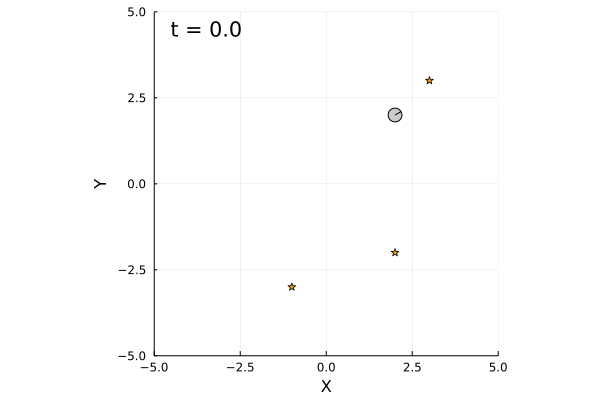

In [20]:
using .AgentRobotWorld
world = AgentRobotWorld.World(10, 1)

### 地図を生成して３つランドマークを追加 ###
m = AgentRobotWorld.Map()
AgentRobotWorld.append(m, AgentRobotWorld.Landmark([2, -2]))
AgentRobotWorld.append(m, AgentRobotWorld.Landmark([-1, -3]))
AgentRobotWorld.append(m, AgentRobotWorld.Landmark([3, 3]))
AgentRobotWorld.append(world, m)

initial_pose = [2, 2, pi/6]
circling = AgentRobotWorld.EstimationAgent(0.2, 10.0/180.0*pi)
r = AgentRobotWorld.RealRobot(initial_pose, :black, 0.2, circling)
AgentRobotWorld.append(world, r)

### アニメーション実行 ###
AgentRobotWorld.draw(world)